In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
sns.set() # Default seaborn styles

In [37]:
df = pd.read_csv('Use_of_Telemedicine_During_COVID-19.csv')

# Remap Indicator Values to Easier to Read Acronyms

In [38]:
indicator_remap = {'Provider offers telemedicine': 'TM', 'Provider offered telemedicine prior to pandemic': 'PTM', 'Scheduled one or more telemedicine appointments': 'STM' }
df['Indicator'] = df['Indicator'].map(indicator_remap)

# Data Exploration

## Get %  of people answering "Yes" one of 3 Telemedicine Questions, Grouped by Age, Chronic Conditions, Etc.

In [39]:
all_yes = df.groupby(['Round','Group', 'Subgroup', 'Indicator']).nth(1).drop(['Sample Size', 'Suppression', 'Significant'], axis = 1)

## Plot % of People with access to Telemedicine Before and After Pandemic

In [40]:
# Pivot so columns are % telehealth before, % scheduled telehealth, % telehealth after pandemic
indicator_by_sgroup = pd.pivot(all_yes.loc[1].reset_index(), index='Subgroup', columns='Indicator', values='Percent')
# Add a column calculating % change between telehealth now and telehealth before pandemic
indicator_by_sgroup['telemed before and after pandemic % change'] = (100 * (indicator_by_sgroup['TM'] - indicator_by_sgroup['PTM']) / indicator_by_sgroup['PTM']).round(2)

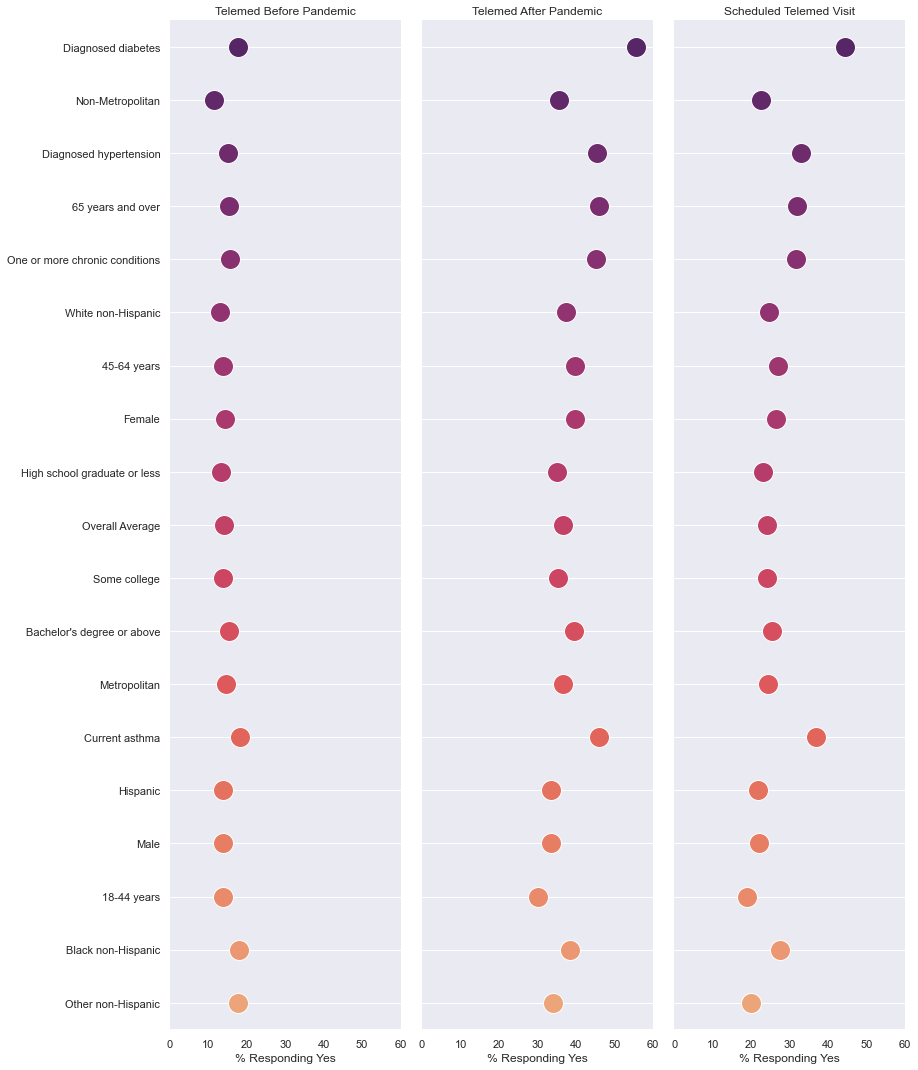

In [41]:
# Reorder columns
indicator_by_sgroup = indicator_by_sgroup.reindex(columns=['PTM', 'TM', "STM", 'telemed before and after pandemic % change'])
# Rename the 'Total' subgroup to be more clear
indicator_by_sgroup.rename(index={'Total': "Overall Average"}, inplace=True)

# Make the PairGrid
g = sns.PairGrid(indicator_by_sgroup.sort_values('telemed before and after pandemic % change', ascending=False).reset_index(),
                 x_vars=indicator_by_sgroup.columns[:-1], y_vars='Subgroup', height=15, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=False, palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 60), xlabel="% Responding Yes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Telemed Before Pandemic", "Telemed After Pandemic", "Scheduled Telemed Visit"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

g.savefig('yes_by_indicator.png')

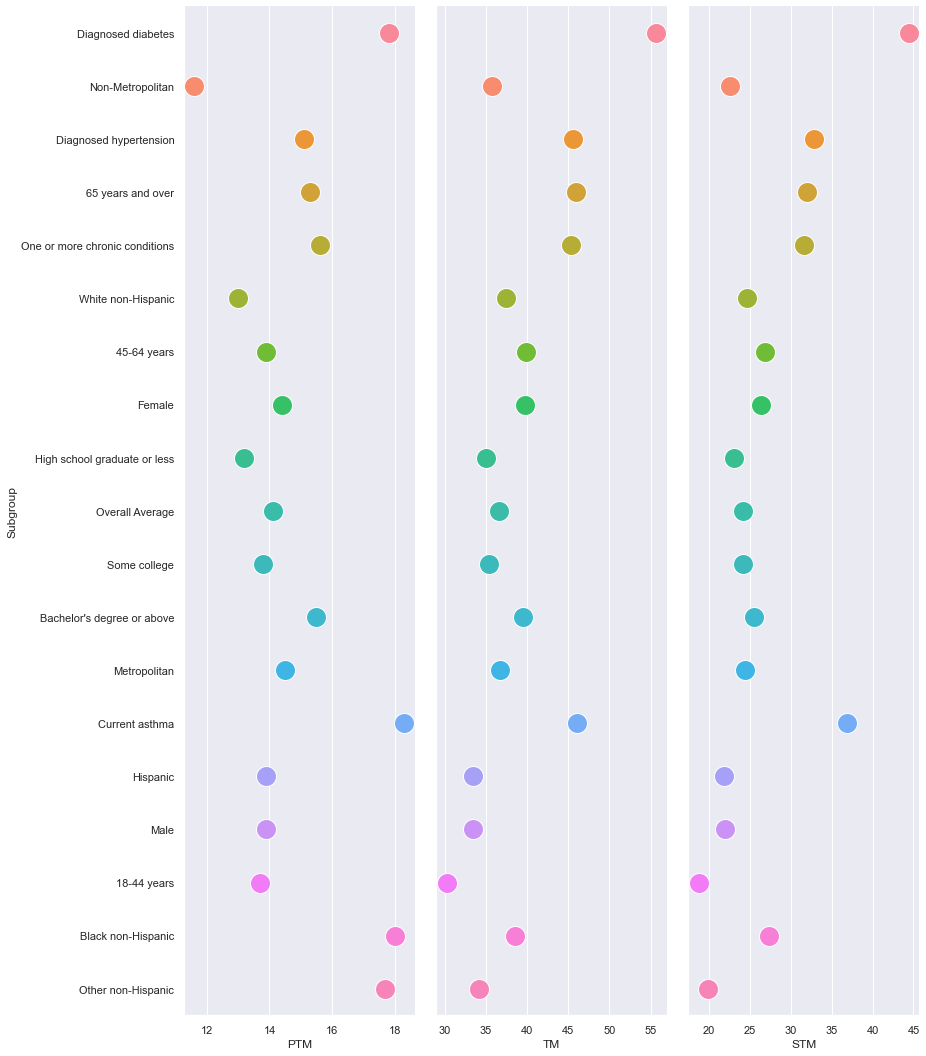

In [42]:
# sns_data = indicator_by_sgroup.sort_values('telemed before and after pandemic % change', ascending=False).reset_index()
# sns.stripplot(sns_data, x=indicator_by_sgroup.columns[:-1], y="Subgroup")

# Make the PairGrid
g2 = sns.PairGrid(indicator_by_sgroup.sort_values('telemed before and after pandemic % change', ascending=False).reset_index(),
                 x_vars=indicator_by_sgroup.columns[:-1], y_vars='Subgroup', height=15, aspect=.25)

# Draw a dot plot using the stripplot function
g2.map(sns.stripplot, size=20, orient="h", jitter=False, linewidth=1, edgecolor="w")

# Table % of People with access to Telehealth Before and After Pandemic and % Ppl that schedule telehealth appointments

In [43]:
# Add a column calculating percentage of ppl with access to telemed actually scheduled 
indicator_by_sgroup['%scheduled of available telemed'] = (100 * indicator_by_sgroup['STM'] / indicator_by_sgroup['TM']).round(2)
indicator_by_sgroup.sort_values('telemed before and after pandemic % change', ascending=False)

Indicator,PTM,TM,STM,telemed before and after pandemic % change,%scheduled of available telemed
Subgroup,,,,,
Diagnosed diabetes,17.8,55.7,44.4,212.92,79.71
Non-Metropolitan,11.6,35.7,22.6,207.76,63.31
Diagnosed hypertension,15.1,45.6,32.9,201.99,72.15
65 years and over,15.3,45.9,32.0,200.00,69.72
One or more chronic conditions,15.6,45.3,31.6,190.38,69.76
White non-Hispanic,13.0,37.4,24.7,187.69,66.04
45-64 years,13.9,39.8,26.9,186.33,67.59
Female,14.4,39.7,26.4,175.69,66.50
High school graduate or less,13.2,35.0,23.1,165.15,66.00


In [125]:
survey_summary = indicator_by_sgroup.iloc[:, 0:3].rename({'PTM': '% Patients offered Telemedicine Before Covid', 'TM': '% Patients Offered Telemedicine During Covid', 'STM': '% Patients Scheduled Telemedicine Visit'}, axis=1)
survey_summary.to_csv('survey_summary.csv')

# Create weights 

In [252]:
discarded_sgroups = ['Current asthma', 'Diagnosed diabetes', 'Diagnosed hypertension', 'Metropolitan', 'Non-Metropolitan', 'Overall Average', 'One or more chronic conditions']

# Remove pre-existing condition subgroups, metropolitan/non metro. subgroups, and the overall average
pre_weight_sgroups = indicator_by_sgroup.drop(discarded_sgroups, axis = 0).iloc[:, 3:]

# Calculate TM score metric
pre_weight_sgroups["TM_score"] = pre_weight_sgroups["telemed before and after pandemic % change"] / pre_weight_sgroups["%scheduled of available telemed"]

In [254]:
scaler = preprocessing.MinMaxScaler()

# Fit the scaler and rename columns, indices to original values
weights = pd.DataFrame(scaler.fit_transform(pre_weight_sgroups)).set_index(pre_weight_sgroups.index).rename({0: 'telemed before and after pandemic % change', 1: '%scheduled of available telemed', 2: 'TM_score'}, axis=1)
weights

,telemed before and after pandemic % change,%scheduled of available telemed,TM_score
Subgroup,,,
18-44 years,0.258804,0.303669,0.270944
45-64 years,0.872648,0.720531,0.912679
65 years and over,1.000000,0.886807,1.000000
Bachelor's degree or above,0.579281,0.483997,0.632888
Black non-Hispanic,0.197783,1.000000,0.009776
Female,0.773523,0.635441,0.823042
High school graduate or less,0.675331,0.596409,0.713991
Hispanic,0.443730,0.562842,0.430807
Male,0.443730,0.586261,0.423199


## Put weights into a dictionary for easy mapping

In [289]:
# Keys are demographic subgroups. Values are a dictionary with the name of the score component and value is the weight itself
# {[subgroup] : {[score_component] : float, ...}, ...}
weights_dict = weights.to_dict(orient='index')

# Score Census Tracks Using Weights

In [318]:
weights_detail = pd.DataFrame(weights.iloc[:, -1].rename('TM Score % Increase in Telemed Usage / % Scheduling Telemed Visit'))
weights_detail.to_csv('weights_detail.csv')

In [291]:
column_order = ['Hispanic', 'Black non-Hispanic', 'Other non-Hispanic',
       'White non-Hispanic', 'Male', 'Female', '18-44 years', '45-64 years', '65 years and over',
       'Bachelor\'s degree or above', 'High school graduate or less',
       'Some college', 'tract_x', 'tract_y', 'latitude', 'longitude',
       'google_loc']

# Demographics % before scoring
tracks_raw = pd.read_csv('ready2weigh.csv')
# Assert column order
tracks_raw = tracks_raw[column_order]

In [292]:
# Apply TM_score weighting for each demographic
tracks = tracks_raw.iloc[:, :-5].apply(lambda series: series * weights_dict.get(series.name)['TM_score'])

In [293]:
# Add up the weighted demographic components of the LOT score
tracks['LOT_raw'] = tracks.iloc[:, :-5].sum(axis=1)

C:\Users\whou1\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOT_raw', ylabel='Density'>

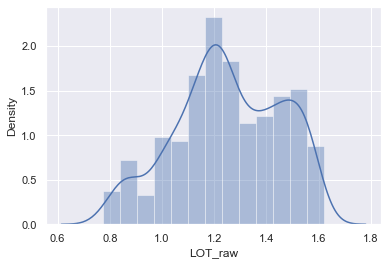

In [294]:
sns.distplot(tracks['LOT_raw'])

In [295]:
# Segment data into 5 LOT bins
tracks['LOT'] = pd.cut(tracks['LOT_raw'], bins=5, labels=[1,2,3,4,5])

<AxesSubplot:xlabel='LOT', ylabel='Count'>

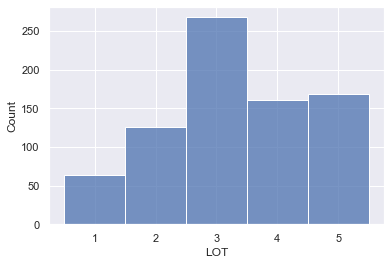

In [296]:
sns.histplot(tracks['LOT'])

In [297]:
# Add Geograph. back data to df
tracks['Lat'] = tracks_raw['latitude']
tracks['Long'] = tracks_raw['longitude']
tracks.iloc[:-1, -3:].to_csv('track_LOT.csv')